<h1 align='center'>Global Poverty Analysis Through Data Visualizations</h1>

<h4 align='center'>Mark Lynch & Andre</h4>
<h4 align='center'>Data Visualization</h4>
<h4 align='center'>7/31/2019</h4>

<br><br>
### 1. About The Data:


In [1]:
with open("poverty.txt") as f:
    print(f.read())


NAME: The Statistics of Poverty and Inequality 
TYPE: Sample
SIZE: 97 observations, 8 variables

DESCRIPTIVE ABSTRACT:
For 97 countries in the world, data are given for birth rates, death
rates, infant death rates, life expectancies for males and females, and
Gross National Product.

SOURCES:
Day, A. (ed.) (1992), _The Annual Register 1992_, 234, London:
Longmans.

_U.N.E.S.C.O. 1990 Demographic Year Book_ (1990), New York: United
Nations.

VARIABLE DESCRIPTIONS:
Columns
 1 -  6   Live birth rate per 1,000 of population
 7 - 14   Death rate per 1,000 of population
15 - 22   Infant deaths per 1,000 of population under 1 year old
23 - 30   Life expectancy at birth for males
31 - 38   Life expectancy at birth for females
39 - 46   Gross National Product per capita in U.S. dollars 
47 - 52   Country Group
          1 = Eastern Europe
          2 = South America and Mexico
          3 = Western Europe, North America, Japan, Australia, New Zealand
          4 = Middle East
          5 = Asi

In [2]:
import pandas
povertydf = pandas.read_csv('poverty.csv')
povertydf.head()

,births,deaths,infant_deaths,female_le,male_le,gnp,country_group,country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,*,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary


<br><br>
### 2. Visualizations:

#### Figure 2.1

In [16]:
# GNP Choropleth 
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Choropleth(autocolorscale = False,
                      colorscale = 'Blues',
                      reversescale = True,
                      locations = povertydf['country'],
                      z = povertydf['gnp'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "GNP Per Capita (USD)"))]

layout = go.Layout(title = go.layout.Title(text = 'Distributed Gross National Product Per Capita'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Distributed Gross National Product Per Capita")

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



    Sample text stand-in for analysis of figure 2.1.


<br>

#### Figure 2.2

In [7]:
# GNP Bar Chart
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int

sorteddf = povertydf.sort_values(by = ['gnp'], ascending = False)

data = [go.Bar(y = sorteddf['gnp'],
               x = sorteddf['country'],
               name = 'Gross National Product')]

layout = go.Layout(title = 'Gross National Product By Country',
                   yaxis = go.layout.YAxis(title = 'Gross National Product Per Capita (USD)'),
                   xaxis = go.layout.XAxis(title = 'Country', automargin = True))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gross National Product By Country')

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



    Sample text stand-in for analysis of figure 2.2.


<br>

#### Figure 2.3

In [8]:
# GNP Distribution Box Plot
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Box(x = povertydf['gnp'], name = 'GNP Distribution')]

layout = go.Layout(title = 'Gross National Product Distribution',
                   xaxis = go.layout.XAxis(title = 'Gross National Product Per Capita (USD)'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gross National Product Distribution')

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



    Sample text stand-in for analysis of figure 2.3.


<br>

#### Figure 2.4

In [9]:
# Birth Rate v. Death Rate Box Plot
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Box(y = povertydf['births'],
               name = 'Births Per 1000'),
        go.Box(y = povertydf['deaths'],
               name = 'Deaths per 1000')]

layout = go.Layout(title = 'Distributed Birth and Death Rates')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Distributed Birth and Death Rates")

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



    Sample text stand-in for analysis of figure 2.4.


<br>

#### Figure 2.5

In [10]:
# Population Growth Choropleth
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf['growth'] = (povertydf['births'] - povertydf['deaths']) / 10

growthdf = povertydf[povertydf['growth'] > 0]
declinedf = povertydf[povertydf['growth'] <= 0]

data = [go.Choropleth(name = 'Growth',
                      autocolorscale = False,
                      colorscale = 'Greens',
                      reversescale = True,
                      locations = growthdf['country'],
                      z = growthdf['growth'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "% Growth")),
        go.Choropleth(name = 'Decline',
                      autocolorscale = False,
                      colorscale = 'Reds',
                      reversescale = True,
                      locations = declinedf['country'],
                      z = declinedf['growth'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "% Decline",
                                                        x = 1.2))]

layout = go.Layout(title = go.layout.Title(text = 'Annual Population Growth'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Annual Population Growth")

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



    Sample text stand-in for analysis of figure 2.5.


<br>

#### Figure 2.6

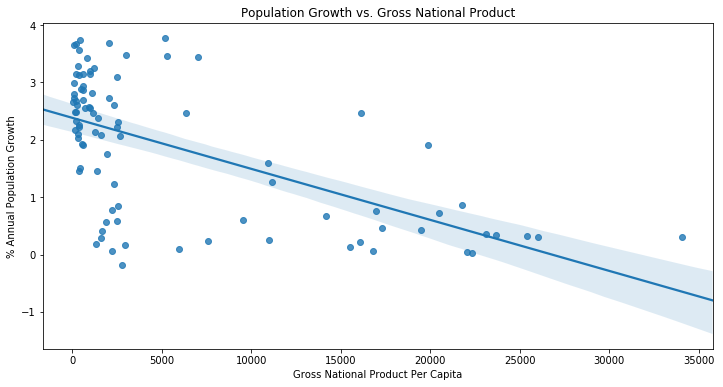

In [11]:
# GNP vs Population Growth Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['growth'] = (povertydf['births'] - povertydf['deaths']) / 10

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'growth',data = povertydf)
vis.set(xlabel = 'Gross National Product Per Capita',
        ylabel = '% Annual Population Growth',
        title = 'Population Growth vs. Gross National Product')
plt.show()

    Sample text stand-in for analysis of figure 2.6.


<br>

#### Figure 2.7

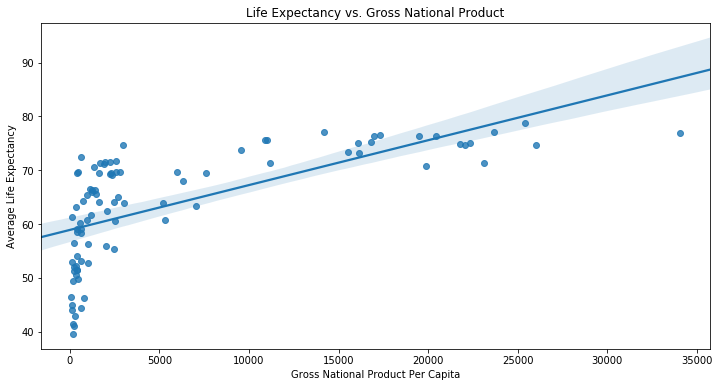

In [12]:
# GNP vs Average Life Expectancy Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['avg_le'] = (povertydf['male_le'] + povertydf['female_le']) / 2

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'avg_le', data = povertydf)
vis.set(xlabel='Gross National Product Per Capita',
        ylabel='Average Life Expectancy',
        title = 'Life Expectancy vs. Gross National Product')
plt.show()

    Sample text stand-in for analysis of figure 2.7.


<br>

#### Figure 2.8

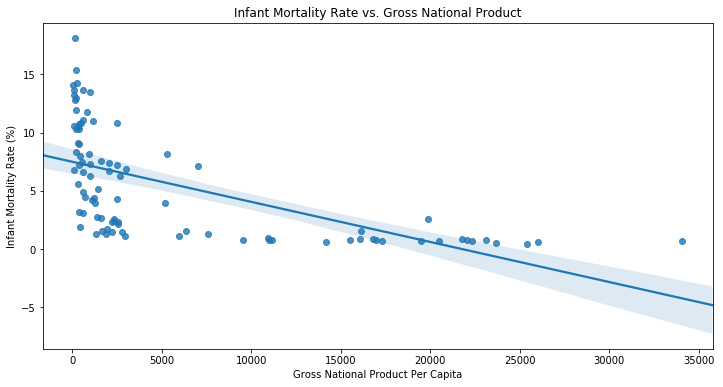

In [13]:
# GNP vs Infant Mortality Rate Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['infant_deaths'] = povertydf['infant_deaths'] / 10

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'infant_deaths', data = povertydf)
vis.set(xlabel='Gross National Product Per Capita',
        ylabel='Infant Mortality Rate (%)',
        title = 'Infant Mortality Rate vs. Gross National Product')
plt.show()

    Sample text stand-in for analysis of figure 2.8.


In [ ]:
# Scatter plots: GNP vs death rate, birth rate

# Figure 2.6

In [ ]:
# Birth rate / Death rate  Bar Chart = Population Growth by Country
import pandas 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = pd.DataFrame(povertydf)


fig = go.Figure()
groups = []

for group, group_df in povertydf.groupby('country_group'):
    groups.append(group)
    fig.add_bar(x=group_df.country,
                y=group_df.births,
                name=str(group)+ " births",
                marker_color = 'blue'),
    fig.add_bar(x=group_df.country,
                y=group_df.deaths,
                name=str(group) + " deaths",
                marker_color = 'orange')
fig.layout.update(
    updatemenus=[
        go.layout.Updatemenu(
        active=0,
        buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Birth and Death Comparison",}]),
                dict(label="Births",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Birth Comparison",}]),
                dict(label="Deaths",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Death Comparison",}]),       
            ]),
        )
    ])
fig.layout.update(title = 'Birth and Death Comparison',
                  xaxis = go.layout.XAxis(title = 'Countries'),
                  yaxis = go.layout.YAxis(title = 'Population per 1000'))

py.iplot(fig)

    Sample text stand-in for analysis of figure 2.6.

# Figure 2.7

In [ ]:
# Scatter plots: GNP vs death rate, birth rate
import pandas 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = pd.DataFrame(povertydf)
sorteddf = povertydf.sort_values(by = ['births'], ascending = False)

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=sorteddf.gnp,
                y=sorteddf.births,
                mode ='markers',
               name = 'Births',
               hovertext =sorteddf.country,
                marker =dict(
                    color = 'blue',
                symbol ='triangle-up')
)),
fig.add_trace(
    go.Scatter(x=sorteddf.gnp,
                y=sorteddf.deaths,
                mode='markers',
                name= 'Deaths',
                  marker =dict(
                    color = 'orange',
                symbol ='x')
))

fig.layout.update(annotations=[
        go.layout.Annotation(
            x=21790,
            y=16.7,
            xref="x",
            yref="y",
            text="U.S.A.",
            showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=16,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="grey",
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="green",
            opacity=0.8
        )
    ],
                  title = 'Gross National Products Vs. Birth & Death Rates',
                  xaxis = go.layout.XAxis(title = 'Gross National Products (USD)'),
                  yaxis = go.layout.YAxis(title = 'Population per 1000'))
py.iplot(fig)

    Sample text stand-in for analysis of figure 2.7.

# Figure 2.8

In [ ]:
# Male vs female life expectancy by region/country/Global
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

fig =go.Figure()
fig.add_box(x = list(povertydf.country_group),
    y = povertydf['male_le'],
               name = 'Male',
           marker_color = 'blue'),
fig.add_box(x = povertydf.country_group,
            y = povertydf['female_le'],
               name = 'Female',
           marker_color = 'pink')
fig.layout.update(
    updatemenus=[
go.layout.Updatemenu(
        active=0,
        buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Male & Female Life Expectancy",}]),
                dict(label="Males",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Male Life Expectancy",}]),
                dict(label="Females",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Female Life Expectancy",}]),       
            ]),
        )
    ])
fig.layout.update(title= "Male & Female Life Expectancy",
                  xaxis = go.layout.XAxis(title = 'Region Groups'),
                  yaxis = go.layout.YAxis(title = 'Age(Year)'))
py.iplot(fig)

    Sample text stand-in for analysis of figure 2.8.

# Figure 2.9

In [ ]:
# Avg Life Expectancy Choropleth

import pandas
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Choropleth(autocolorscale = False,
                      colorscale = 'Viridis',
                      reversescale = False,
                      locations = povertydf['country'],
                      z = (np.around(povertydf['male_le'] + povertydf['female_le']) / 2),
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "Age (Year)"))]

layout = go.Layout(title = go.layout.Title(text = 'Life Expectancy within Regions'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, show_link = False)